<a href="https://colab.research.google.com/github/kxtubh/LungCancerPrediction/blob/main/cnn_lungcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import all dependencies and dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle


In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json # Sets proper file permissions

In [ ]:
!kaggle datasets download -d adityamahimkar/iqothnccd-lung-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset
License(s): copyright-authors


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [ ]:


import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


<ipython-input-7-9c4e654c9cb9>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


#2. Image preprocessing

In [ ]:

file_name = "/content/iqothnccd-lung-cancer-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')



Done


In [ ]:
 os.chdir('/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases')
images = []
labels = []

for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      images.append(img)
      labels.append((i[0:1]))


  0%|          | 0/120 [00:00<?, ?it/s]

In [ ]:
os.chdir('/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      images.append(img)
      labels.append((i[0:1]))

  0%|          | 0/561 [00:00<?, ?it/s]

In [ ]:
os.chdir('/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      images.append(img)
      labels.append((i[0:1]))

  0%|          | 0/416 [00:00<?, ?it/s]

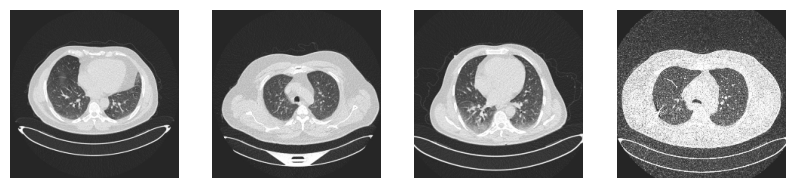

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.axis('off')
plt.show()

#3.Spliting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)


X_train Shape:  (734, 224, 224, 3)
X_test Shape:  (363, 224, 224, 3)
y_train Shape:  (734, 3)
y_test Shape:  (363, 3)


#4. using the pretrained model

In [ ]:
from keras.layers import Conv2D

In [ ]:
model = Sequential()

In [ ]:
# Define a single, coherent model
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

# Fourth convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

# Flatten and dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))  # 3 classes: Benign, Malignant, Normal

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 221, 221, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 64)        │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 106, 106, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 51, 51, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 49, 49, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 47, 47, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 19, 19, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      10,617,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 11,776,995 (44.93 MB)

 Trainable params: 11,776,995 (44.93 MB)

 Non-trainable params: 0 (0.00 B)

#5. Model Training

In [ ]:
# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test)) # Adjust epochs and batch size as needed



Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.4532 - loss: 37.5351 - val_accuracy: 0.5234 - val_loss: 1.0535
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 0.5061 - loss: 0.9425 - val_accuracy: 0.5482 - val_loss: 1.0048
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.6114 - loss: 0.8688 - val_accuracy: 0.4821 - val_loss: 0.9665
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.6331 - loss: 0.8060 - val_accuracy: 0.5510 - val_loss: 0.9173
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.5895 - loss: 0.9311 - val_accuracy: 0.5950 - val_loss: 0.9444
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.6341 - loss: 0.7761 - val_accuracy: 0.6446 - val_loss: 0.8496
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.6987 - loss: 0.7525 - val_accuracy: 0.7107 - val_loss: 0.7901
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.7274 - loss: 0.6716 - val_accuracy: 0.6

#6. Evaluation and Predictions


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8776 - loss: 0.3594
Test Loss: 0.3699
Test Accuracy: 0.8705


In [84]:
def predict_image_with_metrics(image_path, model, y_test=None, y_pred=None):
    """
    Predict the class of a lung image with detailed metrics and visualization, including precision.

    Args:
        image_path (str): Path to the image file.
        model: Trained model for prediction.
        y_test (array-like, optional): True labels for test data (for precision calculation).
        y_pred (array-like, optional): Predicted probabilities for test data (for precision calculation).

    Returns:
        dict: Dictionary containing prediction results and metrics.
    """
    try:
        img = cv2.imread(image_path)
        if img is None:
            return {"error": "Could not load image."}

        img = cv2.resize(img, (224, 224))
        img_expanded = np.expand_dims(img, axis=0)

        # Make the prediction
        prediction = model.predict(img_expanded)
        predicted_class_index = np.argmax(prediction[0])

        # Get confidence scores
        confidence = float(prediction[0][predicted_class_index])

        # Map the index to a class name
        class_names = ['Benign', 'Malignant', 'Normal']
        predicted_class = class_names[predicted_class_index]

        # Class probabilities
        class_probabilities = {class_names[i]: float(prediction[0][i]) for i in range(len(class_names))}

        # Calculate class-wise precision if test data is provided
        precision_values = {}
        if y_test is not None and y_pred is not None:
            # Convert one-hot encoded test labels to class indices if needed
            if len(y_test.shape) > 1 and y_test.shape[1] > 1:
                y_true = np.argmax(y_test, axis=1)
            else:
                y_true = y_test

            # Convert prediction probabilities to class indices if needed
            if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
                y_pred_classes = np.argmax(y_pred, axis=1)
            else:
                y_pred_classes = y_pred

            # Calculate precision for each class
            from sklearn.metrics import precision_score
            precision_per_class = precision_score(y_true, y_pred_classes, labels=range(len(class_names)), average=None)

            # Map precision scores to class names
            for i, cls_name in enumerate(class_names):
                precision_values[cls_name] = float(precision_per_class[i])

        # Print the prediction results with confidence and precision
        print(f"\nPREDICTION RESULTS:")
        print(f"Predicted class: {predicted_class}")
        print(f"Confidence: {confidence:.4f} ({confidence*100:.2f}%)")

        if precision_values:
            class_precision = precision_values.get(predicted_class, "N/A")
            if isinstance(class_precision, float):
                print(f"Class precision: {class_precision:.4f} ({class_precision*100:.2f}%)")
            else:
                print(f"Class precision: {class_precision}")
        else:
            print("Class precision: Not available (requires test data)")

        # Create visualization
        plt.figure(figsize=(12, 6))

        # Show the image
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Input Lung Image")
        plt.axis('off')

        # Show probabilities with precision
        plt.subplot(1, 2, 2)
        colors = ['#2ecc71' if i == predicted_class_index else '#7f8c8d' for i in range(len(class_names))]

        # Plot bars for confidence
        x = np.arange(len(class_names))
        width = 0.35
        confidence_values = [class_probabilities[cls] for cls in class_names]

        bars1 = plt.bar(x - width/2, confidence_values, width, color=colors, label='Confidence')

        # Add precision bars if available
        if precision_values:
            precision_vals = [precision_values.get(cls, 0) for cls in class_names]
            bars2 = plt.bar(x + width/2, precision_vals, width, color=[c.replace('7f', '3f') for c in colors], label='Precision')

            # Add precision values on top of bars
            for i, bar in enumerate(bars2):
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.2f}', ha='center', va='bottom')

        # Add confidence values on top of bars
        for i, bar in enumerate(bars1):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.2f}', ha='center', va='bottom')

        plt.title("Prediction Metrics")
        plt.ylim(0, 1.1)
        plt.xticks(x, class_names)
        plt.legend()
        plt.tight_layout()
        plt.show()

        result_dict = {
            "predicted_class": predicted_class,
            "confidence": confidence,
            "all_probabilities": class_probabilities,
            "image_shape": img.shape
        }

        # Add precision metrics if available
        if precision_values:
            result_dict["precision_values"] = precision_values
            result_dict["class_precision"] = precision_values.get(predicted_class, "N/A")

        return result_dict

    except Exception as e:
        return {"error": f"Error during prediction: {str(e)}"}

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step

PREDICTION RESULTS:
Predicted class: Malignant
Confidence: 0.6598 (65.98%)
Class precision: 0.9471 (94.71%)


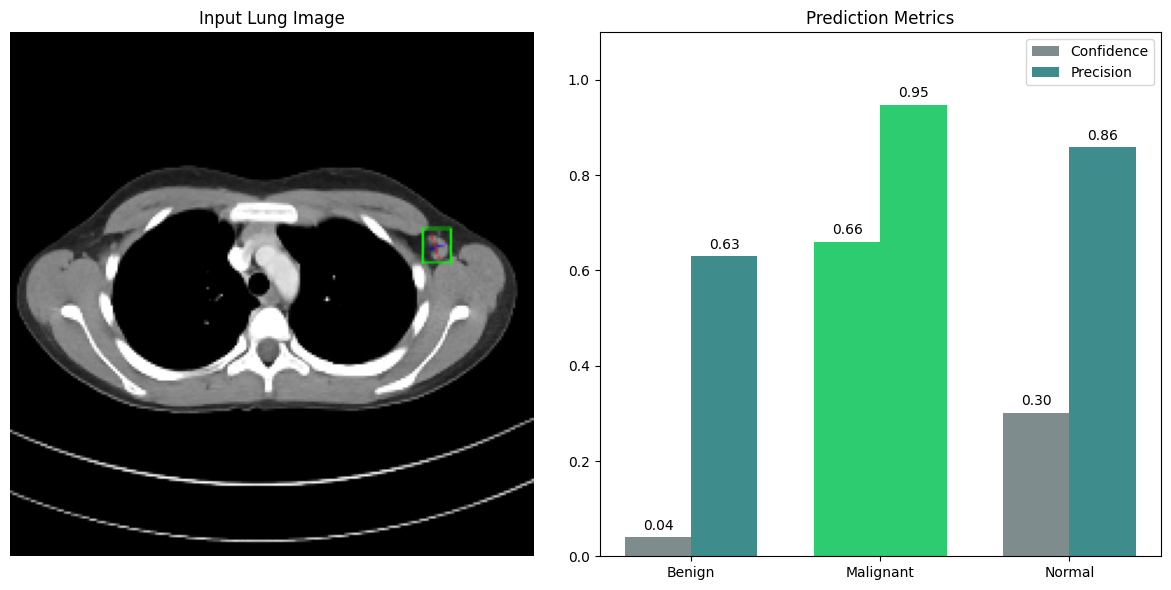

In [85]:
# Get predictions for all test data first
y_pred_proba = model.predict(X_test)

# Then use the function with a specific image
result = predict_image_with_metrics("/content/Test cases/000017_02_01_016.png", model,
                                   y_test=y_test, y_pred=y_pred_proba)

#7.Visualize

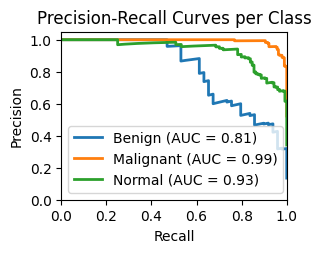

In [86]:
    # 2. Precision-Recall Curves
    class_names=['Benign', 'Malignant', 'Normal']
    plt.subplot(2, 2, 2)
    for i in range(len(class_names)):
        precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred_proba[:, i])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, lw=2, label=f'{class_names[i]} (AUC = {pr_auc:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves per Class')
    plt.legend(loc="lower left")


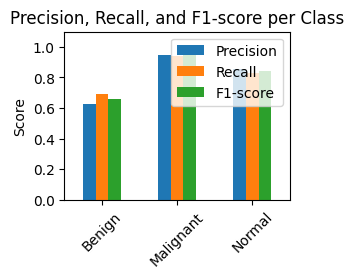

In [87]:

    # 3. Classification metrics (Precision, Recall, F1-score)
    plt.subplot(2, 2, 3)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    report = classification_report(y_test_classes, y_pred, target_names=class_names, output_dict=True)

    metrics_df = pd.DataFrame({
        'Precision': [report[cls]['precision'] for cls in class_names],
        'Recall': [report[cls]['recall'] for cls in class_names],
        'F1-score': [report[cls]['f1-score'] for cls in class_names]
    }, index=class_names)

    metrics_df.plot(kind='bar', ax=plt.gca())
    plt.title('Precision, Recall, and F1-score per Class')
    plt.ylabel('Score')
    plt.ylim([0, 1.1])
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')


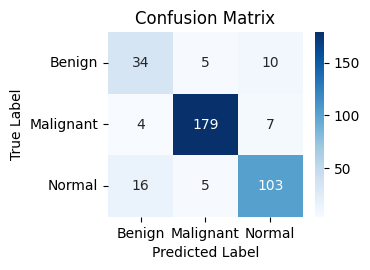

In [88]:
    # 4. Confusion Matrix
    plt.subplot(2, 2, 4)
    cm = confusion_matrix(y_test_classes, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    plt.tight_layout()
    plt.show()

In [89]:
def plot_training_history(history):
    """
    Plot training history including:
    - Accuracy curves
    - Loss curves

    Args:
        history: Training history from model.fit()
    """
    # Create figure with subplots
    plt.figure(figsize=(15, 6))

    # Accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'r-', linewidth=2, label='Training')
    plt.plot(history.history['val_accuracy'], 'b-', linewidth=2, label='Validation')
    plt.title('Model Accuracy', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc='lower right', fontsize=12)

    # Loss subplot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'r-', linewidth=2, label='Training')
    plt.plot(history.history['val_loss'], 'b-', linewidth=2, label='Validation')
    plt.title('Model Loss', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc='upper right', fontsize=12)

    plt.tight_layout()
    plt.show()

    # Calculate improvement metrics
    initial_val_acc = history.history['val_accuracy'][0]
    final_val_acc = history.history['val_accuracy'][-1]
    accuracy_improvement = final_val_acc - initial_val_acc

    initial_val_loss = history.history['val_loss'][0]
    final_val_loss = history.history['val_loss'][-1]
    loss_improvement = initial_val_loss - final_val_loss

    # Print summary statistics
    print(f"Training Summary Statistics:")
    print(f"- Initial validation accuracy: {initial_val_acc:.4f}")
    print(f"- Final validation accuracy: {final_val_acc:.4f}")
    print(f"- Accuracy improvement: {accuracy_improvement:.4f} ({accuracy_improvement*100:.1f}%)")
    print(f"- Initial validation loss: {initial_val_loss:.4f}")
    print(f"- Final validation loss: {final_val_loss:.4f}")
    print(f"- Loss improvement: {loss_improvement:.4f} ({(loss_improvement/initial_val_loss)*100:.1f}%)")



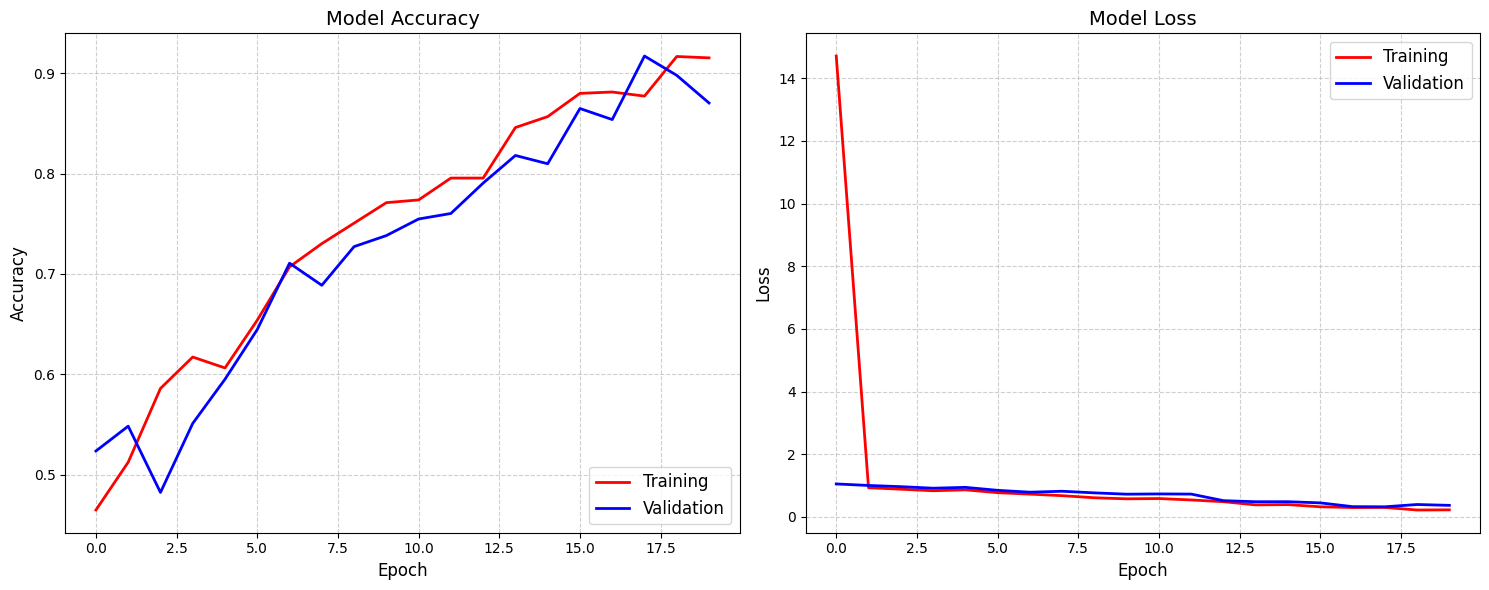

Training Summary Statistics:
- Initial validation accuracy: 0.5234
- Final validation accuracy: 0.8705
- Accuracy improvement: 0.3471 (34.7%)
- Initial validation loss: 1.0535
- Final validation loss: 0.3699
- Loss improvement: 0.6836 (64.9%)


In [ ]:
plot_training_history(history)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


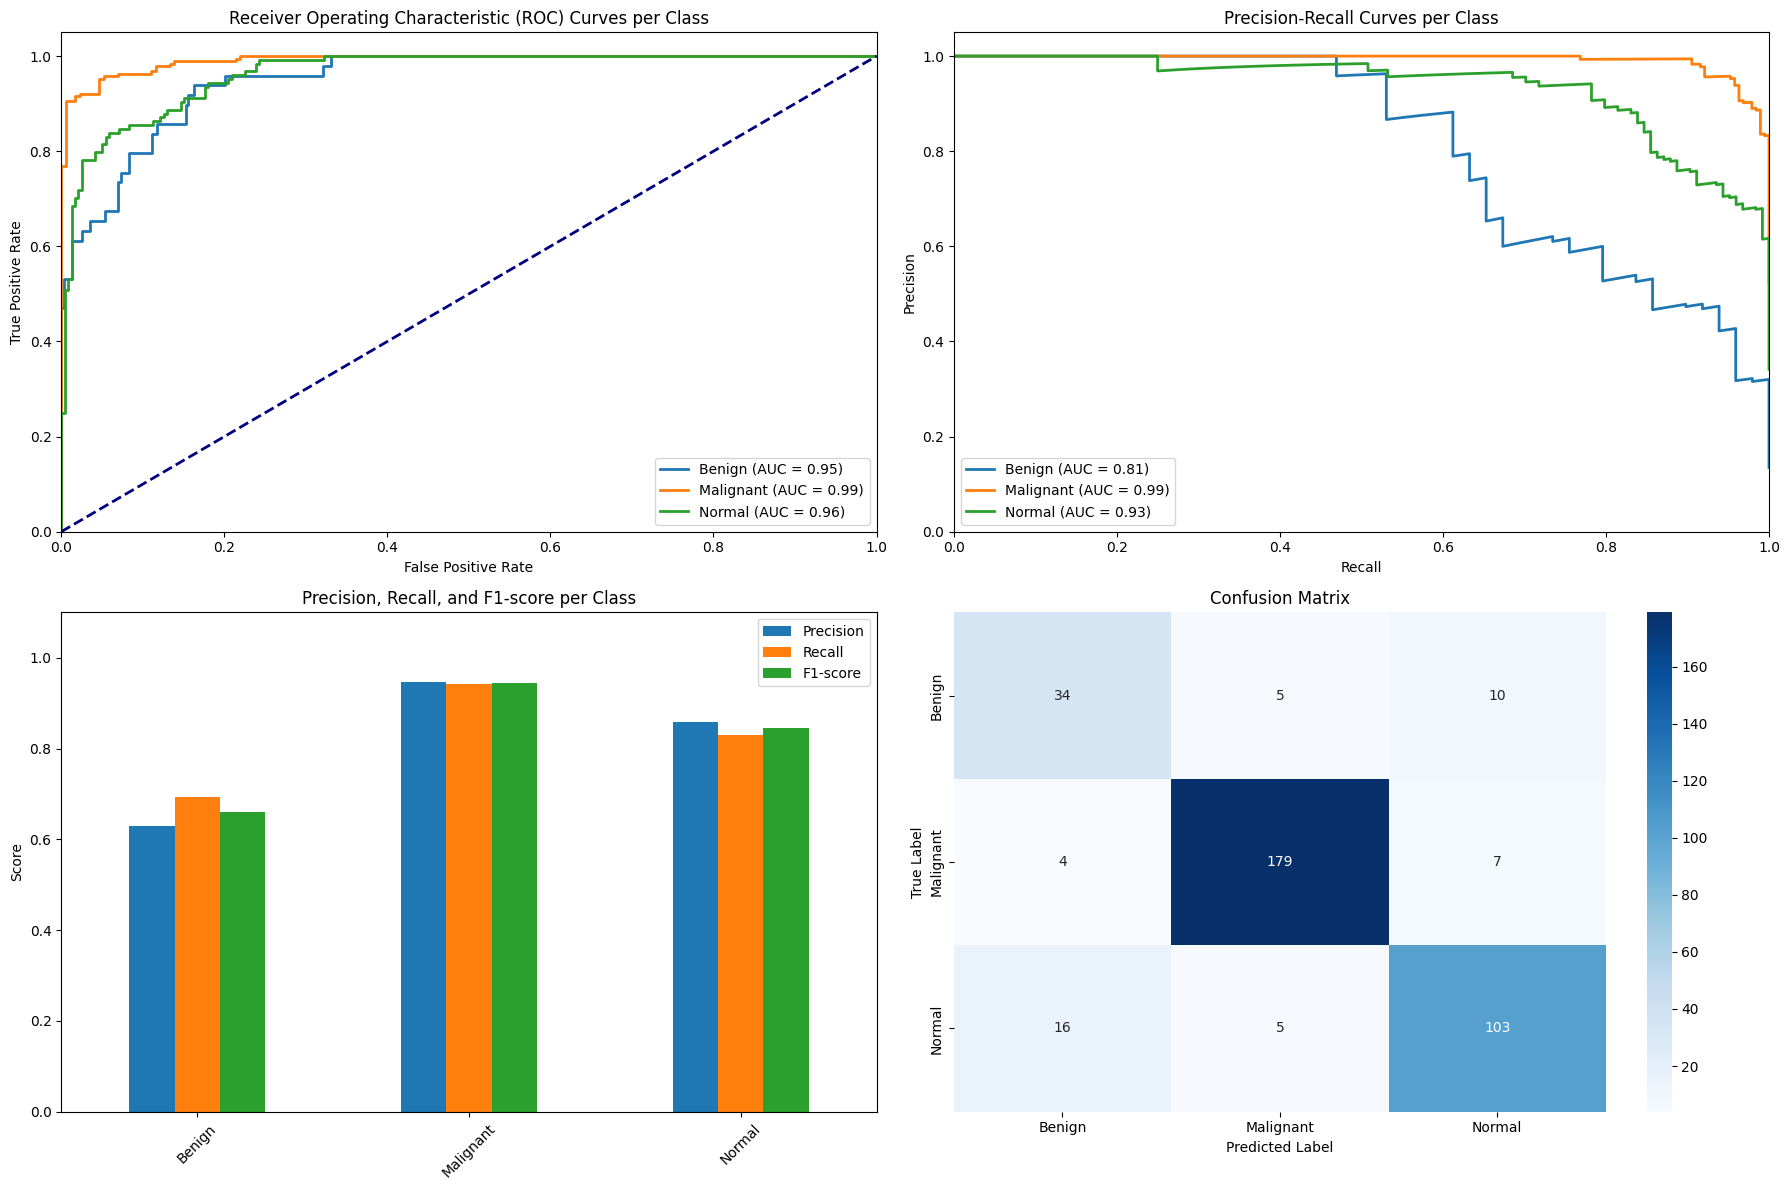

{'Benign': {'precision': 0.6296296296296297, 'recall': 0.6938775510204082, 'f1-score': 0.6601941747572816, 'support': 49.0}, 'Malignant': {'precision': 0.9470899470899471, 'recall': 0.9421052631578948, 'f1-score': 0.9445910290237467, 'support': 190.0}, 'Normal': {'precision': 0.8583333333333333, 'recall': 0.8306451612903226, 'f1-score': 0.8442622950819673, 'support': 124.0}, 'accuracy': 0.8705234159779615, 'macro avg': {'precision': 0.8116843033509701, 'recall': 0.8222093251562085, 'f1-score': 0.8163491662876652, 'support': 363.0}, 'weighted avg': {'precision': 0.8739181133120526, 'recall': 0.8705234159779615, 'f1-score': 0.8719292966054617, 'support': 363.0}}


In [ ]:
metrics_report = plot_evaluation_metrics(model, X_test, y_test)
print(metrics_report)
